In [ ]:
import pandas as pd 
import os
import mpbn
os.chdir('/home/spankaew/Git/BooleanBenchmark')
import logic_ensemble as le
import seaborn as sns
import matplotlib.pyplot as plt

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/BN_TUTO_init+Fx/'
model = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+Fx')
model.create_logic()
model.logic.create_hash()

Loading models logics


100%|██████████| 2240/2240 [00:01<00:00, 1163.34it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:33<00:00, 66.74it/s]


Logic object created
Convert model logics to hash


100%|██████████| 2240/2240 [00:04<00:00, 535.19it/s]

Hash of models created


In [3]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/BN_TUTO_init+t+Fx+Zero/'
model_2 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+t+Fx+Zero')
model_2.create_logic()
model_2.logic.create_hash()

Loading models logics


100%|██████████| 1120/1120 [00:00<00:00, 1121.25it/s]


Concatenate results into matrix


100%|██████████| 1120/1120 [00:07<00:00, 149.94it/s]


Logic object created
Convert model logics to hash


100%|██████████| 1120/1120 [00:02<00:00, 471.10it/s]

Hash of models created


In [4]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/BN_TUTO_init+t+Fx+Zero+UnivConstraints/'
model_3 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+t+Fx+Zero+UnivConstraints')
model_3.create_logic()
model_3.logic.create_hash()

Loading models logics


100%|██████████| 88/88 [00:00<00:00, 606.60it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1534.93it/s]


Logic object created
Convert model logics to hash


100%|██████████| 88/88 [00:00<00:00, 488.42it/s]

Hash of models created


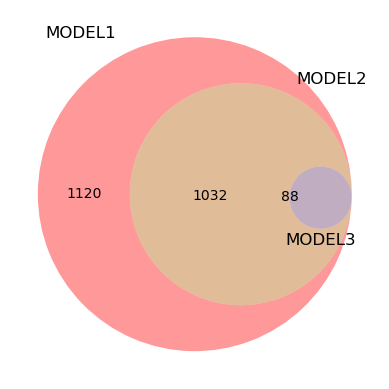

In [9]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3([set(list(model.logic.hash_models)),
       set(list(model_2.logic.hash_models)),
       set(list(model_3.logic.hash_models))],
       set_labels = ('MODEL1','MODEL2','MODEL3'))

plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/Figure_2/venn_models.pdf')
plt.show()
plt.close()

In [6]:
model1_hash = set(list(model.logic.hash_models))
model2_hash = set(list(model_2.logic.hash_models))
model3_hash = set(list(model_3.logic.hash_models))

model1_specific = list(model1_hash - model2_hash - model3_hash)
model2_specific = list(model2_hash - model3_hash)
model3_specific = list(model3_hash)

In [7]:
model.logic.create_flattend_logic_clause()

Flatten models logic clauses


100%|██████████| 2240/2240 [00:00<00:00, 3283901.07it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:38<00:00, 58.90it/s] 

Flattend logic clause created


In [10]:
color_model1 = pd.DataFrame(model1_specific)
color_model1.columns = ['hash']
color_model1['constraint'] = 'Model1_specific'
color_model1_dict = color_model1.set_index('hash')['constraint'].to_dict()

color_model2 = pd.DataFrame(model2_specific)
color_model2.columns = ['hash']
color_model2['constraint'] = 'Model2_specific'
color_model2_dict = color_model2.set_index('hash')['constraint'].to_dict()

color_model3 = pd.DataFrame(model3_specific)
color_model3.columns = ['hash']
color_model3['constraint'] = 'Model3_specific'
color_model3_dict = color_model3.set_index('hash')['constraint'].to_dict()

In [11]:
model_color = model.logic.hash_models

# Replace color
model_color = model_color.replace(color_model1_dict)
model_color = model_color.replace(color_model2_dict)
model_color = model_color.replace(color_model3_dict)

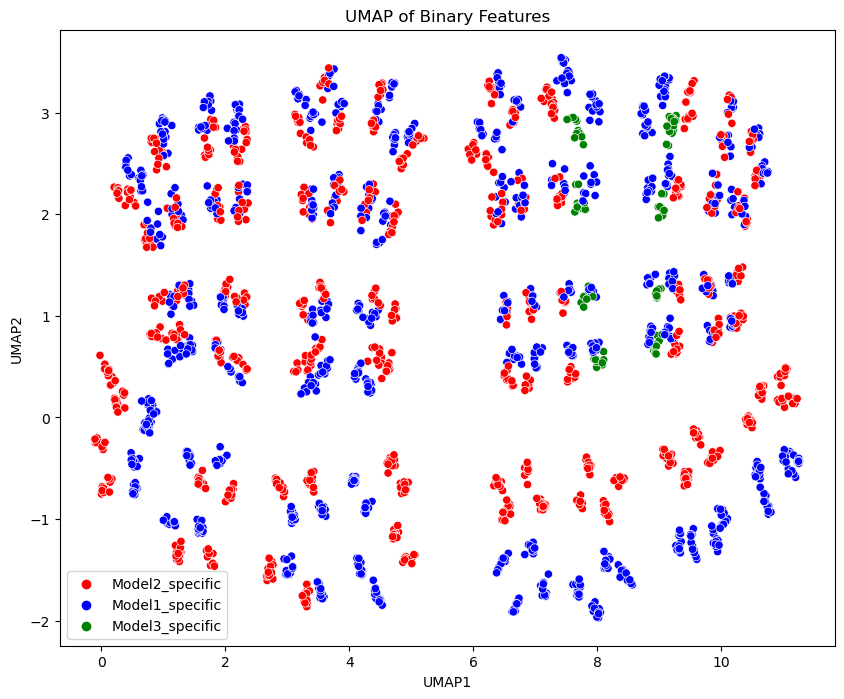

In [11]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

binary_features = model.logic.logic_clause_flattend.transpose()

# Generate UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(binary_features)

# Convert to DataFrame for easier plotting
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df.index = binary_features.index

# Plot the UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_df, hue=model_color, palette=['red', 'blue', 'green'], legend='full')
plt.title('UMAP of Binary Features')
plt.show()

In [13]:
model_color

bn_2226    Model2_specific
bn_411     Model1_specific
bn_361     Model2_specific
bn_1670    Model1_specific
bn_1151    Model1_specific
                ...       
bn_1021    Model2_specific
bn_1945    Model1_specific
bn_2059    Model1_specific
bn_1332    Model1_specific
bn_1909    Model2_specific
Length: 2240, dtype: object

In [12]:
model_color_2 = model_color.copy()
model_color_2 = model_color_2.replace({'Model1_specific':'blue',
                                        'Model2_specific':'green',
                                        'Model3_specific':'red'}) 
model_color_2 = model_color_2.sort_values()
sort_index = model_color_2.index

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


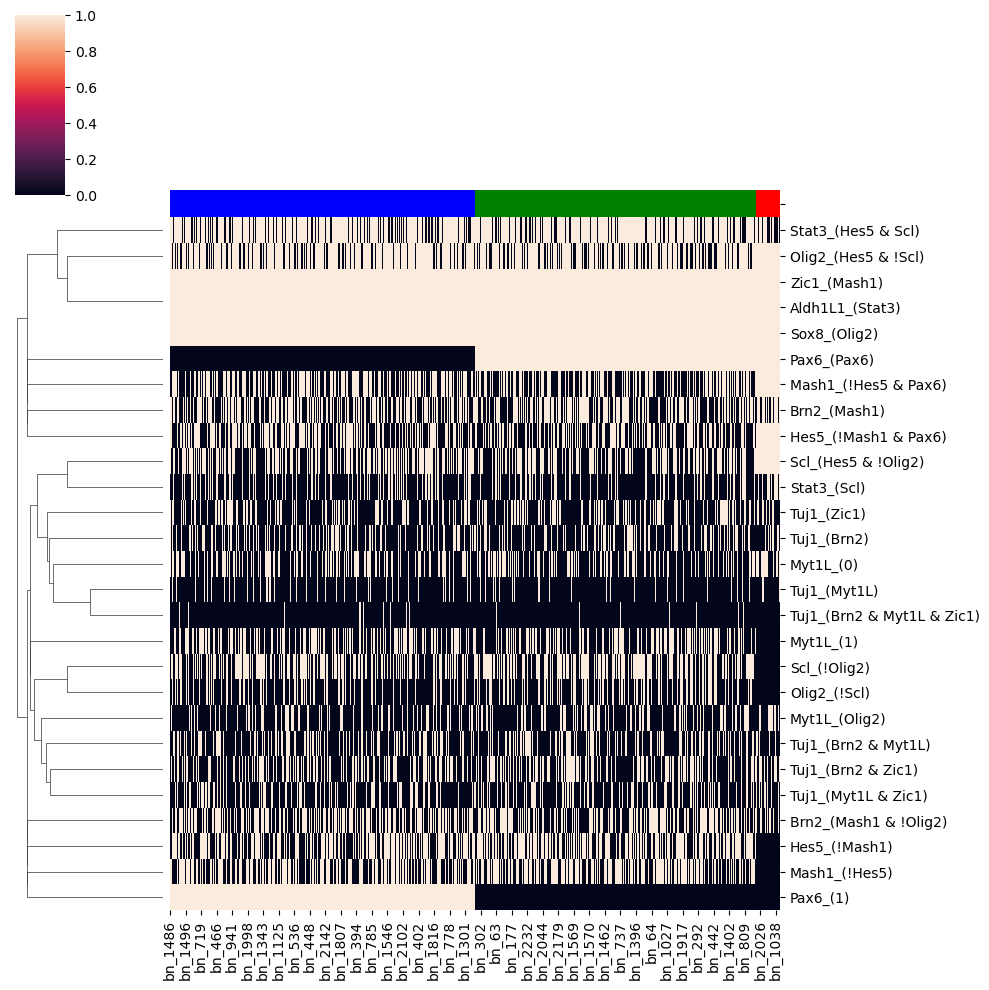

In [ ]:
# Create a clustermap with column colors based on model_color
sns.clustermap(model.logic.logic_clause_flattend[sort_index], 
               col_colors=model_color_2, col_cluster=False)

# Comparing dynamical features

In this part of our script, we compare dynamical features (attractors & simulations) of models in the cohorts

In [16]:
# Calculate model attractors
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 2240/2240 [00:28<00:00, 79.04it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:35<00:00, 62.61it/s]


Attractors calculation completed


bn_2226  bn_411  bn_361  bn_1670  bn_1151  bn_2135  bn_1656  \
101000110100        1       1       0        0        1        1        0   
001011101000        1       0       1        1        0        0        1   
000000010000        1       0       0        0        0        0        0   
010100110011        1       1       0        0        1        1        0   
001001101000        0       1       0        0        1        1        0   
101010010100        0       0       1        0        0        0        0   
010110110011        0       0       1        0        0        0        1   
001011001000        0       0       1        0        0        0        0   
101010110100        0       0       1        1        0        0        1   
010110010011        0       0       1        0        0        0        0   
010110100011        0       0       0        1        0        0        0   
000101101001        0       0       0        0        1        0        0   
010101101011        0       0       0        0        0        1        0   
000010010000        0       0       0        0        0        0        1   
000011001000        0       0       0        0        0        0        1   
010111101011        0       0       0        0        0        0        1   
010100100011        0       0       0        0        0        0        0   
000111001011        0       0       0        0        0        0        0   
000111101011        0       0       0        0        0        0        0   
010100000011        0       0       0        0        0        0        0   
001001001000        0       0       0        0        0        0        0   
101000010100        0       0       0        0        0        0        0   
000001001000        0       0       0        0        0        0        0   
010100010011        0       0       0        0        0        0        0   
000000000000        0       0       0        0        0        0        0   
000101001001        0       0       0        0        0        0        0   
000101001011        0       0       0        0        0        0        0   
000101101011        0       0       0        0        0        0        0   
010101001011        0       0       0        0        0        0        0   
010111001011        0       0       0        0        0        0        0   
010110000011        0       0       0        0        0        0        0   
000111101001        0       0       0        0        0        0        0   
000111001001        0       0       0        0        0        0        0   
000010000000        0       0       0        0        0        0        0   

              bn_1118  bn_2077  bn_1144  bn_1004  bn_1677  bn_60  bn_1065  \
101000110100        1        0        1        0        0      0        0   
001011101000        0        1        1        1        1      1        1   
000000010000        0        0        0        0        0      0        0   
010100110011        0        0        1        0        0      0        0   
001001101000        1        0        0        0        0      0        0   
101010010100        0        0        0        1        0      1        1   
010110110011        0        0        0        0        0      1        1   
001011001000        0        0        0        1        0      1        1   
101010110100        0        1        0        1        1      1        1   
010110010011        0        0        0        0        0      1        1   
010110100011        0        1        0        1        1      0        0   
000101101001        0        0        0        0        0      0        0   
010101101011        0        0        0        0        0      0        0   
000010010000        0        0        0        0        0      0        0   
000011001000        0        0        0        0        0      0        0   
010111101011        0        0        0        0        0      0        0   
010100100

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


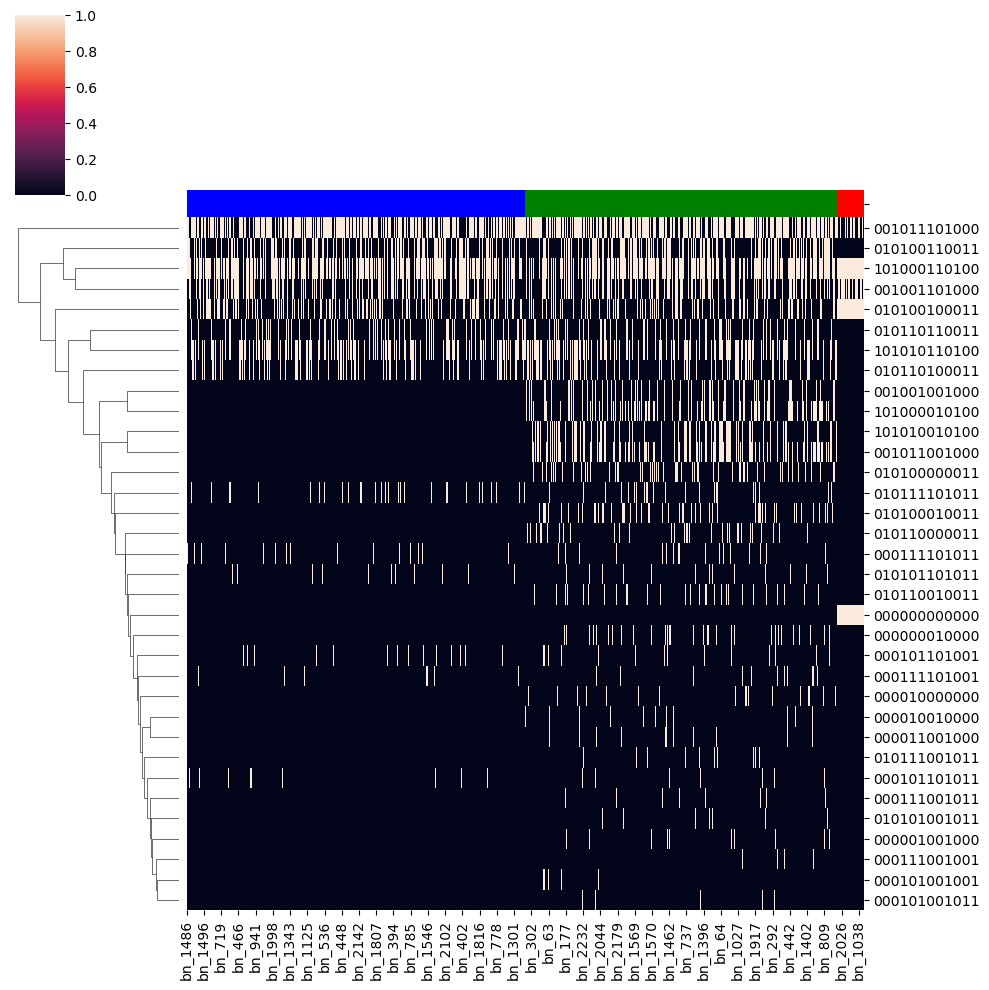

In [17]:
# Create a clustermap with column colors based on model_color
sns.clustermap(model.attractor.attractors_df[sort_index],
               col_colors=model_color_2, col_cluster=False)

# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [19]:
model.create_simulation()
# setup initial state for the simulation
initial_state = {'Pax6':1}
model.simulation.update_parameters(max_time = 20)
model.simulation.run_simulation(initial_state = initial_state)

Simulation object created
Start simulation


100%|██████████| 2240/2240 [04:01<00:00,  9.26it/s]


Simulation completed


Trajectory object created


/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


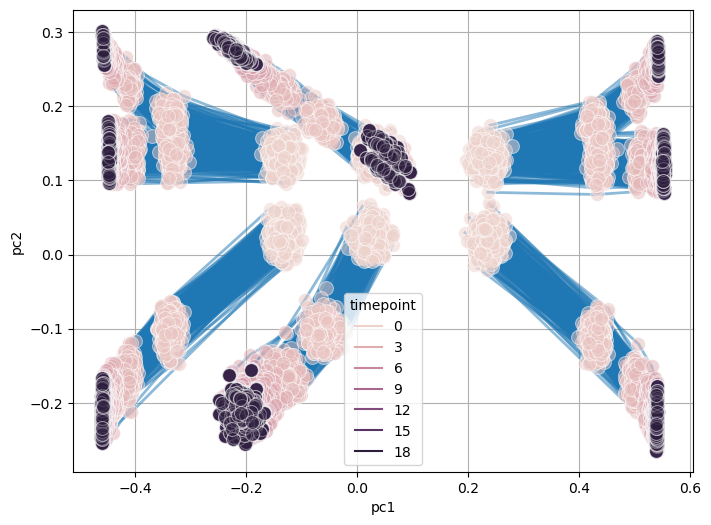

In [20]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

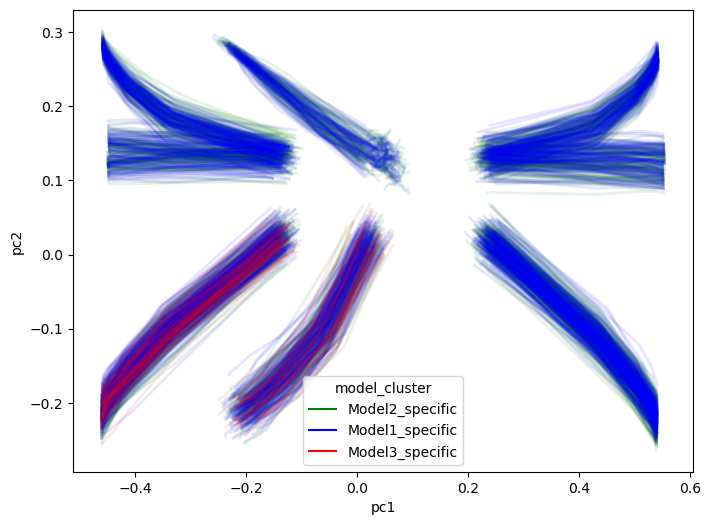

In [33]:
pca_df = model.trajectory.pca_df
model_color_dict = model_color.to_dict()
pca_df['model_cluster'] = pca_df['model_id']
pca_df['model_cluster'] = pca_df['model_cluster'].replace(model_color_dict)

fig_size = (8,6)
show_legend = True

## Calculate the mean position
model_cluster_traj = pca_df.groupby(['timepoint','model_cluster'])[['pc1','pc2']].mean()

# Adjust figure size
plt.figure(figsize = fig_size)

## Plot with Seaborn
plot = sns.lineplot(data=pca_df, 
                    x='pc1', y='pc2',
                    hue='model_cluster', units='model_id', estimator=None, lw=2, alpha=.1,
                    sort=False, 
                    palette={'Model1_specific': 'blue', 'Model2_specific': 'green', 'Model3_specific': 'red'})
if show_legend == False:
    plot.get_legend().remove()
